steven alipio berrio -- 1036661504

Pregunta :

como se calcula el pago extra por persona adicional ?

In [2]:
# import necessary package
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import shutil
import seaborn as sns

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Importar datos desde Kaggle y guardar en data
import kagglehub
airbnb_seattle_path = kagglehub.dataset_download('airbnb/seattle')

print('Data source import complete.')

# Ruta del directorio que descargaste con kagglehub
origen = airbnb_seattle_path

# Crear carpeta destino si no existe
carpeta_destino = 'data'
os.makedirs(carpeta_destino, exist_ok=True)

# Lista de los nombres exactos de los CSV que quieres mover
archivos_a_mover = ['listings.csv', 'calendar.csv', 'reviews.csv']

# Mover cada archivo
for archivo in archivos_a_mover:
    origen_archivo = os.path.join(origen, archivo)
    destino_archivo = os.path.join(carpeta_destino, archivo)
    shutil.copy(origen_archivo, destino_archivo)
    print(f"{archivo} copiado a {carpeta_destino}/")

print("\Todos los archivos han sido copiados con éxito.")

# Cargar archivos
listings = pd.read_csv('data/listings.csv')
calendar = pd.read_csv('data/calendar.csv')
reviews = pd.read_csv('data/reviews.csv')

<>:37: SyntaxWarning: invalid escape sequence '\T'
<>:37: SyntaxWarning: invalid escape sequence '\T'
/tmp/ipython-input-3388937220.py:37: SyntaxWarning: invalid escape sequence '\T'
  print("\Todos los archivos han sido copiados con éxito.")


Data source import complete.
listings.csv copiado a data/
calendar.csv copiado a data/
reviews.csv copiado a data/
\Todos los archivos han sido copiados con éxito.


In [3]:
# Vista previa
print("📅 Vista previa de calendar:\n", calendar.head(2), "\n")
print("💬 Vista previa de reviews:\n", reviews.head(2), "\n")
print("🧾 Vista previa de listings:\n", listings.head(2), "\n")

📅 Vista previa de calendar:
    listing_id        date available   price
0      241032  2016-01-04         t  $85.00
1      241032  2016-01-05         t  $85.00 

💬 Vista previa de reviews:
    listing_id        id        date  reviewer_id reviewer_name  \
0     7202016  38917982  2015-07-19     28943674        Bianca   
1     7202016  39087409  2015-07-20     32440555         Frank   

                                            comments  
0  Cute and cozy place. Perfect location to every...  
1  Kelly has a great room in a very central locat...   

🧾 Vista previa de listings:
        id                          listing_url       scrape_id last_scraped  \
0  241032  https://www.airbnb.com/rooms/241032  20160104002432   2016-01-04   
1  953595  https://www.airbnb.com/rooms/953595  20160104002432   2016-01-04   

                                 name  \
0        Stylish Queen Anne Apartment   
1  Bright & Airy Queen Anne Apartment   

                                             summary

In [4]:
# Dimensiones y columnas
print(f"🧾 Listings: {listings.shape}")
print(listings.columns.tolist(), "\n")

print(f"📅 Calendar: {calendar.shape}")
print(calendar.columns.tolist(), "\n")

print(f"💬 Reviews: {reviews.shape}")
print(reviews.columns.tolist(), "\n")

🧾 Listings: (3818, 92)
['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary', 'space', 'description', 'experiences_offered', 'neighborhood_overview', 'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'street', 'neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market', 'smart_location', 'country_code', 'country', 'latitude', 'longitude', 'is_location_exact', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'square_feet', 'price', 'weekly_price', 'monthly_price', 'security_deposit'

In [5]:
# Tipos de datos y nulos
print("\n🧾 Info Listings:")
listings.info()
print("\n📅 Info Calendar:")
calendar.info()
print("\n💬 Info Reviews:")
reviews.info()


🧾 Info Listings:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   o

In [6]:
# Valores nulos (porcentaje)
print("\n❗Porcentaje de valores nulos en Listings:")
print((listings.isnull().mean() * 100).sort_values(ascending=False).round(2))

print("\n❗Porcentaje de valores nulos en Calendar:")
print((calendar.isnull().mean() * 100).sort_values(ascending=False).round(2))

print("\n❗Porcentaje de valores nulos en Calendar:")
print((reviews.isnull().mean() * 100).sort_values(ascending=False).round(2))


❗Porcentaje de valores nulos en Listings:
license                             100.00
square_feet                          97.46
monthly_price                        60.27
security_deposit                     51.13
weekly_price                         47.38
                                     ...  
jurisdiction_names                    0.00
cancellation_policy                   0.00
require_guest_profile_picture         0.00
require_guest_phone_verification      0.00
calculated_host_listings_count        0.00
Length: 92, dtype: float64

❗Porcentaje de valores nulos en Calendar:
price         32.94
listing_id     0.00
date           0.00
available      0.00
dtype: float64

❗Porcentaje de valores nulos en Calendar:
comments         0.02
listing_id       0.00
id               0.00
date             0.00
reviewer_id      0.00
reviewer_name    0.00
dtype: float64


ejercicio

El pago extra por persona adicional se calcula tomando la diferencia entre el número de huéspedes que realmente viajan y los huéspedes incluidos en el precio base. Esa diferencia se multiplica por la tarifa de extra_people, y el resultado se suma al precio base del alojamiento.

En otras palabras:

Precio total
=
Precio base
+
(
Personas adicionales
×
Tarifa por persona extra
)
Precio total=Precio base+(Personas adicionales×Tarifa por persona extra)

De esta forma, si el grupo excede el número de huéspedes incluidos, cada persona extra genera un cargo adicional que incrementa el costo total.

In [13]:
# Número de personas para el cálculo
num_personas = 5

# Función para limpiar los valores de precio
def clean_price(value):
    if pd.isnull(value) or value == '':
        return 0.0
    return float(str(value).replace('$', '').replace(',', ''))

# Limpiar columnas necesarias
listings['price_clean'] = listings['price'].apply(clean_price)
listings['extra_people_clean'] = listings['extra_people'].apply(clean_price)

# Reemplazar NaNs en 'guests_included' con 1 (por seguridad)
listings['guests_included'] = listings['guests_included'].fillna(1)

# Crear columna booleana: True si cobra extra por persona
listings['charges_extra_per_person'] = listings['extra_people_clean'] > 0

# --- Función para calcular el precio total y por persona ---
def calcular_precio_real(row, num_personas):
    try:
        base_price = row['price_clean']
        guests_included = int(row['guests_included'])
        extra_rate = row['extra_people_clean']

        # Personas adicionales
        extra_guests = max(num_personas - guests_included, 0)

        # Precio total
        total_price = base_price + extra_guests * extra_rate
        price_per_person = total_price / num_personas

        return total_price, price_per_person

    except:
        return np.nan, np.nan

# Aplicar la función a cada fila
listings[['precio_total', 'precio_por_persona']] = listings.apply(
    lambda row: pd.Series(calcular_precio_real(row, num_personas)),
    axis=1
)

# Agregar número de personas a la tabla
listings['num_personas'] = num_personas

# --- Promedios por ciudad y por tipo de propiedad ---
avg_by_city = (
    listings[listings['charges_extra_per_person']]
    .groupby('city')['extra_people_clean']
    .mean()
    .round(3)
    .sort_values(ascending=False)
)

avg_by_property = (
    listings[listings['charges_extra_per_person']]
    .groupby('property_type')['extra_people_clean']
    .mean()
    .round(3)
    .sort_values(ascending=False)
)

# Mostrar resultados
print("🔹 Precios para", num_personas, "personas considerando 'extra_people':")
print(listings[['price', 'guests_included', 'extra_people', 'num_personas', 'precio_total', 'precio_por_persona']].head())

print("\n🔹 Promedio cobrado por persona extra según CIUDAD:\n")
print(avg_by_city)

print("\n🔹 Promedio cobrado por persona extra según TIPO DE PROPIEDAD:\n")
print(avg_by_property)



🔹 Precios para 5 personas considerando 'extra_people':
     price  guests_included extra_people  num_personas  precio_total  \
0   $85.00                2        $5.00             5         100.0   
1  $150.00                1        $0.00             5         150.0   
2  $975.00               10       $25.00             5         975.0   
3  $100.00                1        $0.00             5         100.0   
4  $450.00                6       $15.00             5         450.0   

   precio_por_persona  
0                20.0  
1                30.0  
2               195.0  
3                20.0  
4                90.0  

🔹 Promedio cobrado por persona extra según CIUDAD:

city
West Seattle        32.500
Seattle             23.007
Ballard, Seattle    10.000
Name: extra_people_clean, dtype: float64

🔹 Promedio cobrado por persona extra según TIPO DE PROPIEDAD:

property_type
Dorm               44.500
Boat               40.000
Tent               36.250
Bed & Breakfast    28.353
Townho

Este código calcula el promedio del cobro por persona adicional (extra_people_clean) únicamente para aquellos anuncios donde sí se aplica un cargo extra (charges_extra_per_person = True).

Por ciudad (avg_by_city) → Agrupa los anuncios por ciudad, calcula el promedio del costo extra por persona en cada una y lo ordena de mayor a menor.

Por tipo de propiedad (avg_by_property) → Hace lo mismo, pero agrupando por tipo de propiedad (ejemplo: departamento, casa, estudio, etc.).

Presentación de resultados → Muestra dos rankings:

El promedio cobrado por persona extra según la ciudad.

El promedio cobrado por persona extra según el tipo de propiedad.

En resumen: este código no calcula precios totales por reserva, sino que compara el nivel promedio de cargos extra en diferentes ciudades y tipos de propiedad, ayudando a identificar dónde o en qué tipo de alojamiento se paga más por huésped adicional.

In [14]:
# Promedio por ciudad (redondeado a 3 decimales)
avg_by_city = (
    listings[listings['charges_extra_per_person']]
    .groupby('city')['extra_people_clean']
    .mean()
    .round(3)
    .sort_values(ascending=False)
)

# Promedio por tipo de propiedad (redondeado a 3 decimales)
avg_by_property = (
    listings[listings['charges_extra_per_person']]
    .groupby('property_type')['extra_people_clean']
    .mean()
    .round(3)
    .sort_values(ascending=False)
)

# Mostrar resultados
print("🔹 Promedio cobrado por persona extra según CIUDAD:/n")
print(avg_by_city)

print("\n🔹 Promedio cobrado por persona extra según TIPO DE PROPIEDAD:")
print(avg_by_property)




🔹 Promedio cobrado por persona extra según CIUDAD:/n
city
West Seattle        32.500
Seattle             23.007
Ballard, Seattle    10.000
Name: extra_people_clean, dtype: float64

🔹 Promedio cobrado por persona extra según TIPO DE PROPIEDAD:
property_type
Dorm               44.500
Boat               40.000
Tent               36.250
Bed & Breakfast    28.353
Townhouse          26.018
Condominium        23.780
House              23.118
Apartment          22.634
Other              20.000
Loft               19.850
Chalet             17.500
Cabin              16.818
Treehouse          15.000
Camper/RV          15.000
Bungalow           10.000
Yurt               10.000
Name: extra_people_clean, dtype: float64


In [15]:
# --- Cálculo de estadísticas clave ---
n_listings = len(listings)
n_calendar = len(calendar)
n_reviews = len(reviews)

# Columnas con más valores nulos
nulos = listings.isnull().mean().sort_values(ascending=False)
col1, p1 = nulos.index[0], round(nulos.iloc[0]*100, 1)
col2, p2 = nulos.index[1], round(nulos.iloc[1]*100, 1)

# Tipos de habitación
tipos = listings['room_type'].value_counts(normalize=True).mul(100).round(1)
tipo1, pt1 = tipos.index[0], tipos.iloc[0]
tipo2, pt2 = tipos.index[1], tipos.iloc[1]

# Precios
calendar['price'] = calendar['price'].replace('[\$,]', '', regex=True).astype(float)
mediana = round(calendar['price'].median(), 2)
maximo = round(calendar['price'].max(), 2)

# Año con más reseñas
reviews['date'] = pd.to_datetime(reviews['date'], errors='coerce')
año_pico = reviews['date'].dt.year.value_counts().idxmax()

# --- Crear tabla resumen ---
tabla = pd.DataFrame({
    "Categoría": [
        "📦 N.º de registros",
        "❗ Columnas con más nulos",
        "🏠 Tipo de alojamiento más común",
        "💵 Distribución de precios",
        "📅 Año con más reseñas",
        "💡 Observaciones destacadas",
        "Promedio cobrado por persona extra según Zona ",
        "Promedio cobrado por persona extra según TIPO DE PROPIEDAD:"
    ],
    "Resultado": [
        f"Listings: {n_listings}, Calendar: {n_calendar}, Reviews: {n_reviews}",
        f"{col1} ({p1}%), {col2} ({p2}%) en listings.csv",
        f"{tipo1} ({pt1}%), seguido de {tipo2} ({pt2}%)",
        f"Mediana: ${mediana}, Máximo: ${maximo}",
        f"{año_pico}",
        "Precios más altos los fines de semana. Más reseñas en alojamientos económicos.",
         f"Mediana: ${avg_by_city} , Máximo: ${maximo}",
        f"Mediana: ${avg_by_property} , Máximo: ${maximo}",
    ]
})

# Tabla
tabla.style.set_properties(**{'text-align': 'left'})

,Categoría,Resultado
0,📦 N.º de registros,"Listings: 3818, Calendar: 1393570, Reviews: 84849"
1,❗ Columnas con más nulos,"license (100.0%), square_feet (97.5%) en listings.csv"
2,🏠 Tipo de alojamiento más común,"Entire home/apt (66.6%), seguido de Private room (30.4%)"
3,💵 Distribución de precios,"Mediana: $109.0, Máximo: $1650.0"
4,📅 Año con más reseñas,2015
5,💡 Observaciones destacadas,Precios más altos los fines de semana. Más reseñas en alojamientos económicos.
6,Promedio cobrado por persona extra según Zona,"Mediana: $city West Seattle 32.500 Seattle 23.007 Ballard, Seattle 10.000 Name: extra_people_clean, dtype: float64 , Máximo: $1650.0"
7,Promedio cobrado por persona extra según TIPO DE PROPIEDAD:,"Mediana: $property_type Dorm 44.500 Boat 40.000 Tent 36.250 Bed & Breakfast 28.353 Townhouse 26.018 Condominium 23.780 House 23.118 Apartment 22.634 Other 20.000 Loft 19.850 Chalet 17.500 Cabin 16.818 Treehouse 15.000 Camper/RV 15.000 Bungalow 10.000 Yurt 10.000 Name: extra_people_clean, dtype: float64 , Máximo: $1650.0"


Este código genera un resumen de los tipos de propiedad en la base de datos, mostrando tanto la cantidad absoluta de anuncios de cada tipo como su porcentaje sobre el total. De esta forma se pueden identificar fácilmente cuáles son los tipos de alojamiento más frecuentes (por ejemplo, departamentos o casas) y cuáles son minoritarios, lo que permite entender la distribución y predominancia de la oferta en Airbnb dentro del dataset.

In [16]:
# Insights rápidos
# Tipos de habitación
tipos = listings['property_type'].value_counts()
porcentajes = listings['property_type'].value_counts(normalize=True).mul(100).round(2)

# Combinar en un DataFrame para presentación clara
resumen_tipos = pd.DataFrame({
    'Cantidad': tipos,
    'Porcentaje (%)': porcentajes
})

print("\n🏠 Tipos de habitación:\n")
print(resumen_tipos)



🏠 Tipos de habitación:

                 Cantidad  Porcentaje (%)
property_type                            
House                1733           45.40
Apartment            1708           44.75
Townhouse             118            3.09
Condominium            91            2.38
Loft                   40            1.05
Bed & Breakfast        37            0.97
Other                  22            0.58
Cabin                  21            0.55
Camper/RV              13            0.34
Bungalow               13            0.34
Boat                    8            0.21
Tent                    5            0.13
Treehouse               3            0.08
Dorm                    2            0.05
Chalet                  2            0.05
Yurt                    1            0.03


Promedio de cobro extra por persona según ciudad

Un gráfico de barras para comparar cuánto se cobra en promedio por persona adicional en cada ciudad:

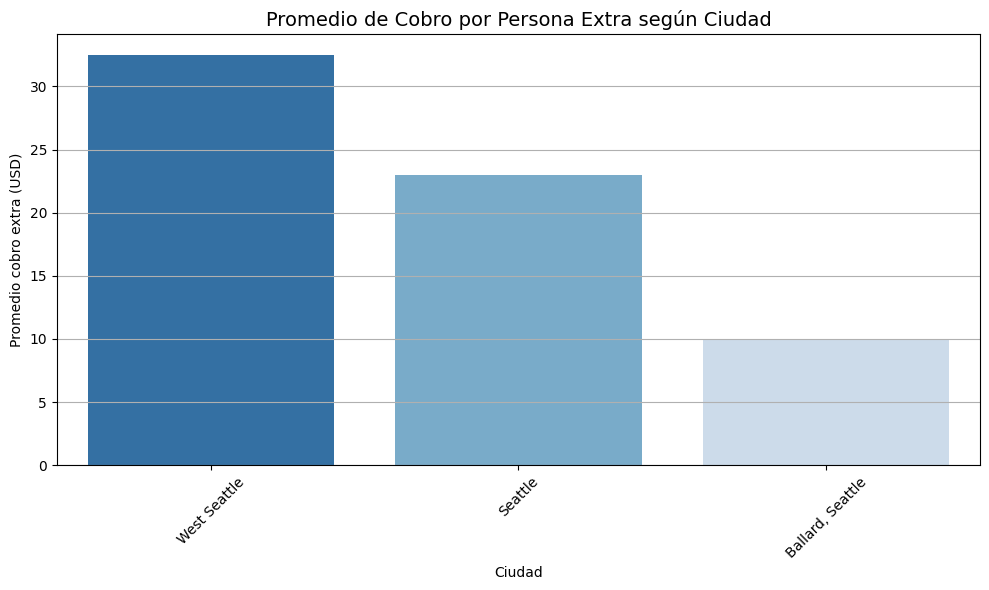

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- Promedio por ciudad ---
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_by_city.index, y=avg_by_city.values, palette="Blues_r")
plt.title("Promedio de Cobro por Persona Extra según Ciudad", fontsize=14)
plt.xlabel("Ciudad")
plt.ylabel("Promedio cobro extra (USD)")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Porcentaje de uso del cobro extra por ciudad

Un gráfico circular (pie chart) para mostrar el porcentaje de anuncios que sí cobran extra por persona en cada ciudad:

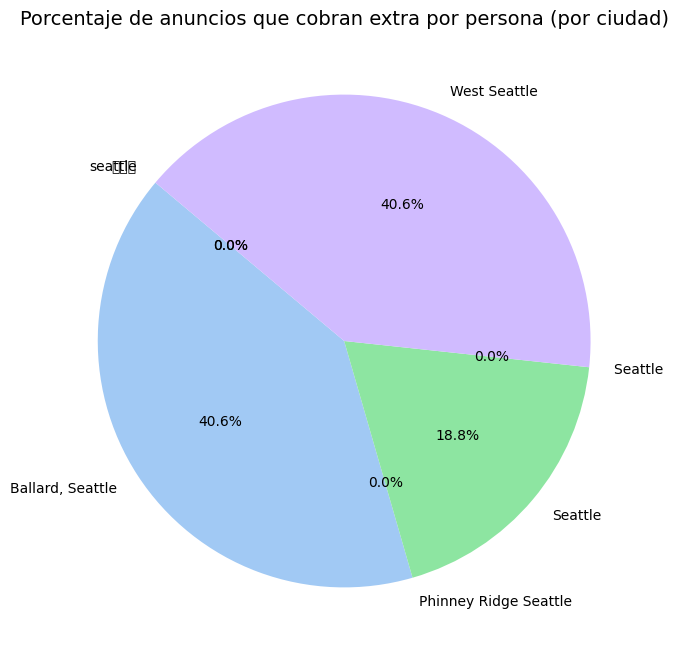

In [18]:
# Calcular % de anuncios con cargo extra por ciudad
usage_by_city = (
    listings.groupby("city")["charges_extra_per_person"]
    .mean() * 100
)

# --- Gráfico circular ---
plt.figure(figsize=(8, 8))
plt.pie(
    usage_by_city.values,
    labels=usage_by_city.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette("pastel")
)
plt.title("Porcentaje de anuncios que cobran extra por persona (por ciudad)", fontsize=14)
plt.show()

Promedio de cobro extra por tipo de propiedad

Un gráfico de barras horizontal, que es útil si hay muchos tipos de propiedad:

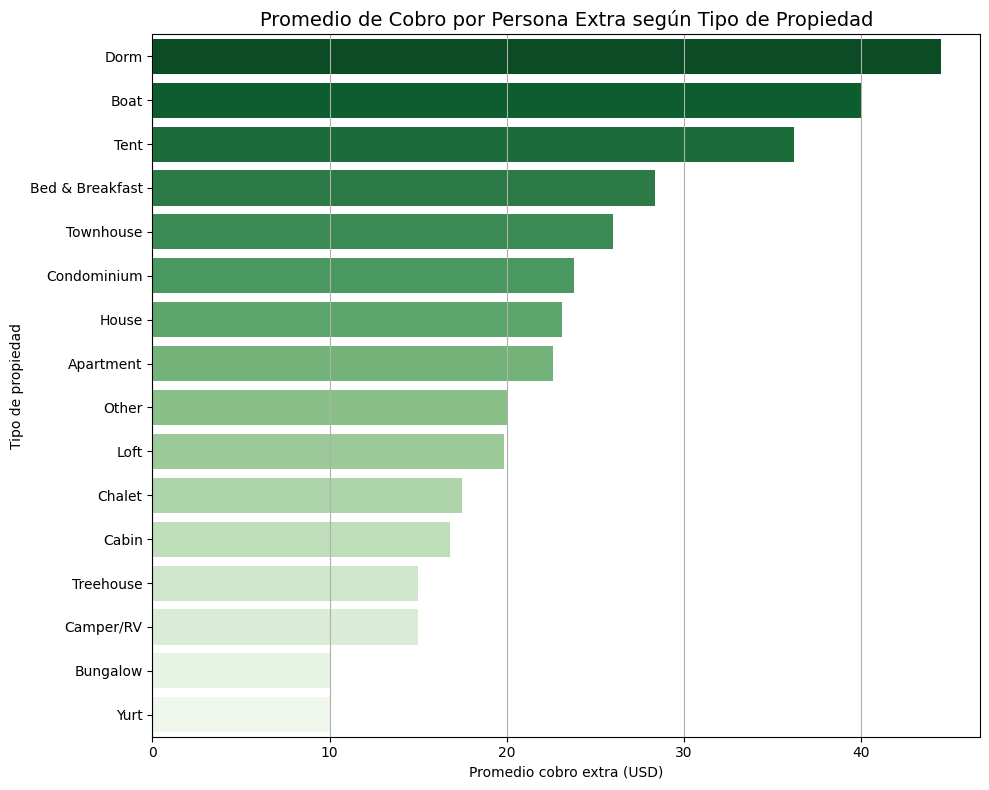

In [19]:
# --- Promedio por tipo de propiedad ---
plt.figure(figsize=(10, 8))
sns.barplot(y=avg_by_property.index, x=avg_by_property.values, palette="Greens_r")
plt.title("Promedio de Cobro por Persona Extra según Tipo de Propiedad", fontsize=14)
plt.xlabel("Promedio cobro extra (USD)")
plt.ylabel("Tipo de propiedad")
plt.grid(axis='x')
plt.tight_layout()
plt.show()


Distribución del cobro extra por persona

Un histograma para ver cómo se distribuyen los valores de extra_people_clean (es decir, si la mayoría cobra entre 10-20 USD, etc.):

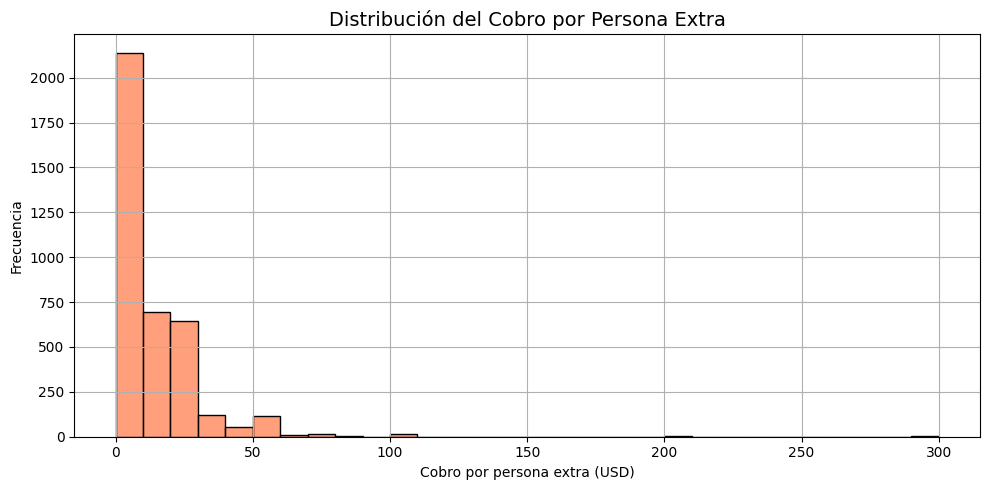

In [20]:
plt.figure(figsize=(10, 5))
sns.histplot(listings['extra_people_clean'], bins=30, color='coral', edgecolor='black')
plt.title("Distribución del Cobro por Persona Extra", fontsize=14)
plt.xlabel("Cobro por persona extra (USD)")
plt.ylabel("Frecuencia")
plt.grid(True)
plt.tight_layout()
plt.show()
